In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

%matplotlib inline

In [2]:
data = pd.read_json('data/nepali-movies.json')

In [3]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017
4,"Drama, Romance",https://www.imdb.com/title/tt8475990/?ref_=adv...,An romantic relationship between a celebrity a...,NaN,None,A Mero Hajur 3,NaN,2019


# Genre Analysis

In [4]:
data['genre'].value_counts()

Drama                              125
Short, Drama                        56
Drama, Romance                      40
Documentary                         37
Romance                             37
Documentary, Short                  34
Short                               27
Action                              19
Comedy                              16
Comedy, Drama                       16
Short, Music                        14
Short, Musical                      13
Action, Drama                       10
Musical                              8
Drama, Family                        7
Thriller                             6
Short, Drama, Family                 6
Documentary, Short, Drama            5
Documentary, Short, Adventure        5
Crime                                4
Documentary, Short, Biography        4
Family                               4
Drama, History                       4
Comedy, Drama, Romance               4
Drama, Musical                       4
Documentary, Adventure   

In [5]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

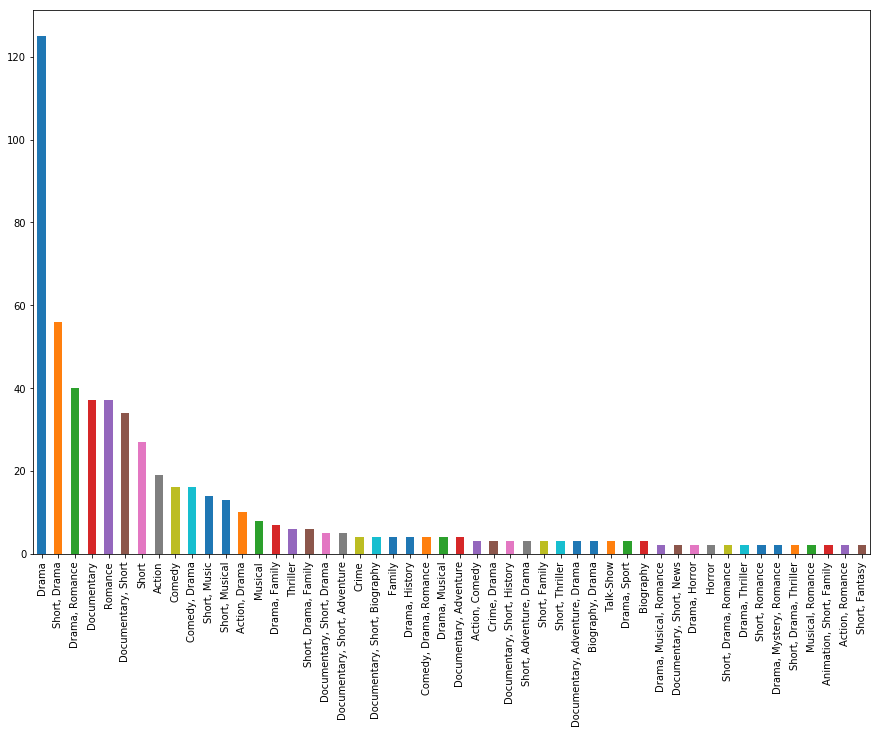

In [6]:
data['genre'].value_counts()[:50].plot('bar')

#### Simple Genre
The original data consists of multiple genre for each movie. So, here I break down them into simple (and common) genres to make the analysis efficient.

In [7]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [8]:
count_map = {}
for genre in genre_list:
    count_map[genre] = len(data['genre'].dropna().apply(lambda x : genre if genre in x.lower() else None).dropna())

In [9]:
count_map

{'drama': 334,
 'romance': 107,
 'comedy': 50,
 'biography': 19,
 'documentary': 110,
 'crime': 16,
 'thriller': 19,
 'action': 48,
 'music': 54}

In [10]:
types = np.array(list(count_map.keys()))
types

array(['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime',
       'thriller', 'action', 'music'], dtype='<U11')

In [11]:
counts = np.array(list(count_map.values()))
counts

array([334, 107,  50,  19, 110,  16,  19,  48,  54])

In [12]:
#types[np.argsort(counts)[::-1]]

Text(0.5, 1.0, 'Nepali Movie Genre')

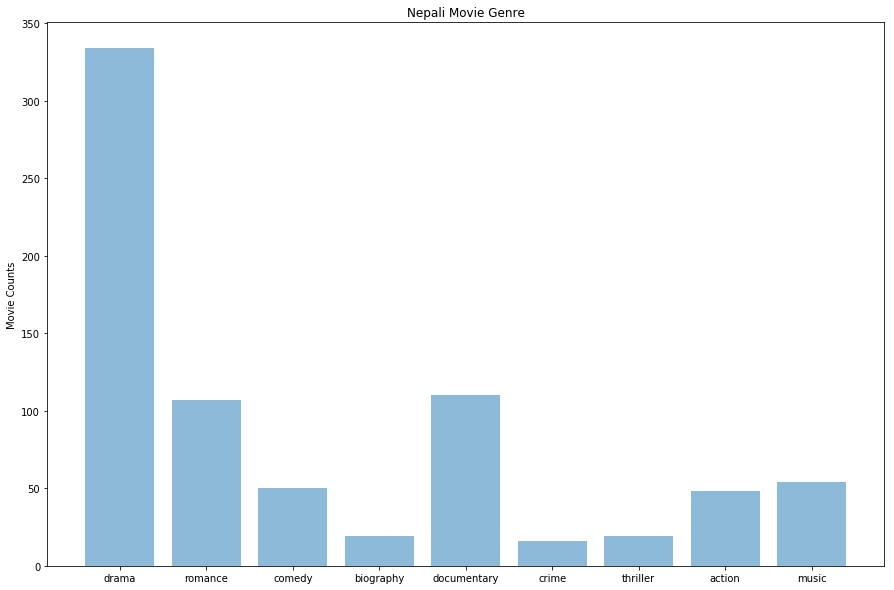

In [13]:
y_pos = np.arange(len(types))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Movie Counts')
plt.title('Nepali Movie Genre')

In [14]:
data['rating'].describe()

count    225.000000
mean       7.647556
std        1.078402
min        2.900000
25%        7.000000
50%        7.800000
75%        8.400000
max       10.000000
Name: rating, dtype: float64

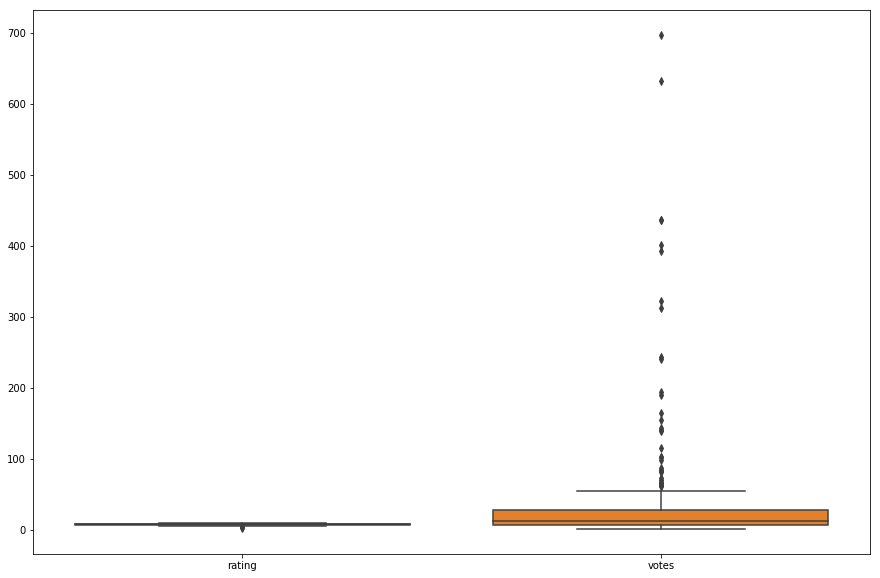

In [15]:
sns.boxplot(data=data)

# Year and Rating

In [16]:
df_rating = data[data['rating'].notnull()]
df_rating = df_rating[['rating', 'year']]
df_rating

,rating,year
0,8.2,2017
1,6.8,2017
2,6.2,2018
3,8.4,2017
5,8.3,2017
6,7.0,2016
8,8.4,2003
9,9.1,2018
10,7.2,2017
11,8.3,2018


In [17]:
df_rating_mean = df_rating.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1964,9.000000
1,1966,9.700000
2,1973,8.600000
3,1977,9.000000
4,1978,8.500000
5,1983,6.800000
6,1984,8.350000
7,1985,7.100000
8,1987,7.750000
9,1989,8.100000


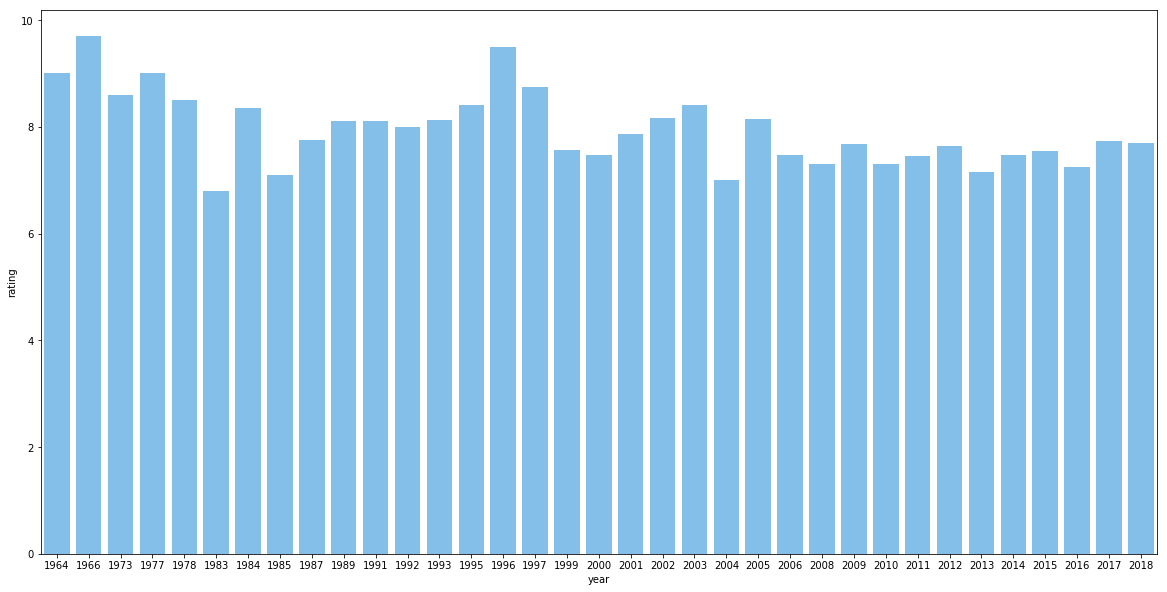

In [18]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [19]:
df_rating[df_rating['year'] == 1966]

,rating,year
106,9.7,1966


In [20]:
df_rating[df_rating['year'] == 1996]

,rating,year
72,9.5,1996


In [21]:
data['rating'].mean()

7.647555555555556

In [22]:
df_rating.describe()

,rating
count,225.000000
mean,7.647556
std,1.078402
min,2.900000
25%,7.000000
50%,7.800000
75%,8.400000
max,10.000000


#### thoughts
It seems there are no drastic fluctuations in ratings based on year. The average rating till 2018 is **7.6**.
The highest ratings seem to in the year 1966 and 1996.
But that doesn't mean they are good representation for the analysis since **1996** has only one non-null rating value while **1966** has only a single movie in the database.

# Year and Movie Count

In [23]:
df_movie_count = df_rating.groupby('year').count()
df_movie_count.reset_index(inplace=True)
df_movie_count.columns = ['year', 'movie_count']
df_movie_count

,year,movie_count
0,1964,1
1,1966,1
2,1973,1
3,1977,1
4,1978,1
5,1983,1
6,1984,2
7,1985,1
8,1987,2
9,1989,1


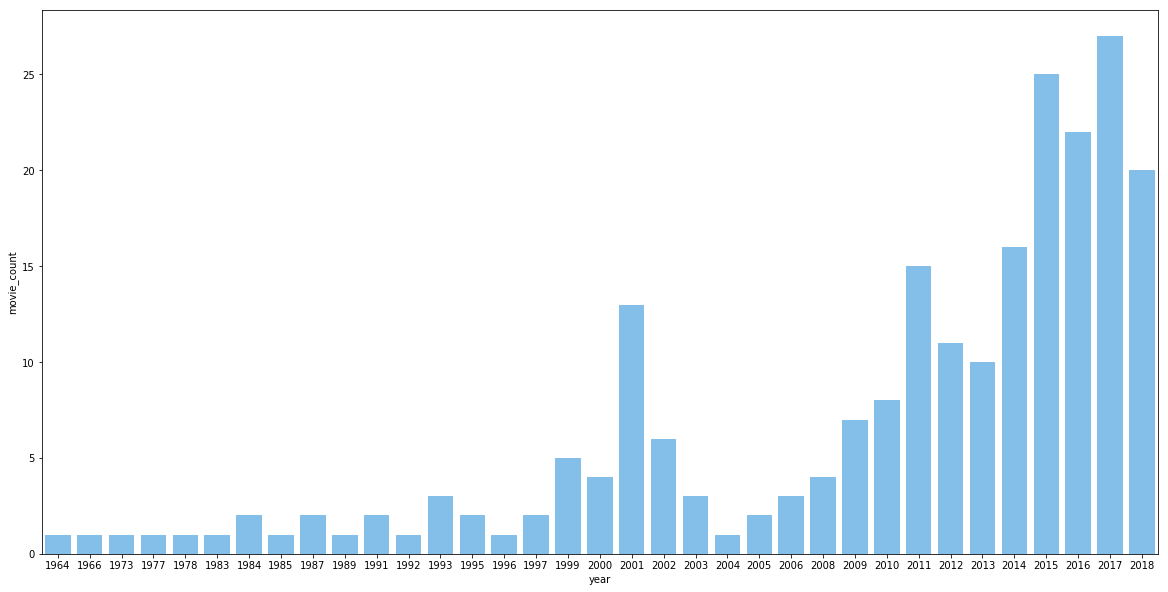

In [24]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='movie_count', data=df_movie_count, color='#73C2FB')

#### thoughts
It seems, the total number of Nepali movies got a big dip around the years **2001-2011** with **2004** being the lowest. Perhaps, it might be due to the [Nepalese Civil war](https://en.wikipedia.org/wiki/Nepalese_Civil_War). This is just my hypothesis for this.  
Since then, the total number of movies per year is increasing (with some minor ups and downs).

# Rating filtered by Movie Count per Year

In [25]:
df_rating_2 = pd.concat([group for _, group in df_rating.groupby('year') if len(group) > 2])

In [26]:
df_rating_2

,rating,year
129,7.8,1993
251,8.2,1993
275,8.4,1993
52,7.5,1999
239,7.8,1999
260,8.4,1999
551,7.9,1999
654,6.2,1999
153,8.1,2000
215,8.0,2000


#### thoughts
Now, let's take only those years that have more than a single movie.

In [27]:
df_rating_mean = df_rating_2.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1993,8.133333
1,1999,7.560000
2,2000,7.475000
3,2001,7.861538
4,2002,8.166667
5,2003,8.400000
6,2006,7.466667
7,2008,7.300000
8,2009,7.685714
9,2010,7.312500


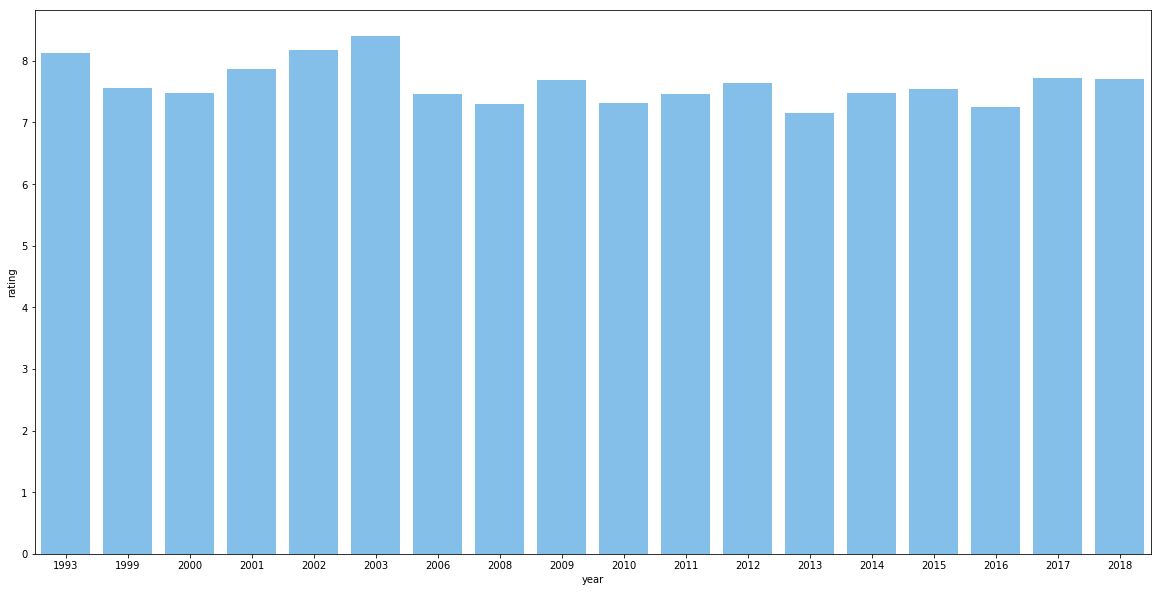

In [29]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [30]:
df_rating_mean['rating'].describe()

count    18.000000
mean      7.628935
std       0.333637
min       7.160000
25%       7.456667
50%       7.554000
75%       7.719444
max       8.400000
Name: rating, dtype: float64

#### thoughts
From the bar plot, we can see that the average rating per year in steady throughout.     
I have no idea (at the time of writing this). :D

# Movie Runtime

In [32]:
data.isnull().sum()

genre        79
imdb_url      0
plot          0
rating      498
runtime     374
title         0
votes       498
year          3
dtype: int64

In [46]:
df_runtime = data[data['runtime'].notnull()]
df_runtime.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138 min,Prem Geet 2,84.0,2017
6,"Adventure, Drama",https://www.imdb.com/title/tt3638644/?ref_=adv...,Anti-regime partisan Chandra confronts physica...,7.0,89 min,Seto Surya,322.0,2016
7,"Drama, Thriller",https://www.imdb.com/title/tt7869010/?ref_=adv...,Three people rob the houses of rich people whe...,NaN,138 min,Sherbahadur,NaN,2018


In [47]:
df_runtime['runtime'] = df_runtime['runtime'].apply(lambda x : int(re.findall(r'\d+', x)[0]))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 722
Data columns (total 8 columns):
genre       346 non-null object
imdb_url    349 non-null object
plot        349 non-null object
rating      134 non-null float64
runtime     349 non-null int64
title       349 non-null object
votes       134 non-null float64
year        349 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ KB


In [49]:
df_runtime.describe()

,rating,runtime,votes
count,134.000000,349.000000,134.000000
mean,7.648507,67.873926,59.582090
std,1.086467,53.596472,114.326225
min,2.900000,1.000000,1.000000
25%,7.000000,15.000000,8.250000
50%,7.800000,55.000000,17.500000
75%,8.400000,126.000000,50.750000
max,10.000000,180.000000,697.000000


#### thoughts
Average runtime is **68 minutes**.

## Runtime and Category

In [57]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [78]:
df = df_runtime[df_runtime['genre'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138,A Mero Hajur 2,164.0,2017
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138,Chhakka Panja 2,190.0,2017
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138,Prem Geet 2,84.0,2017
6,"Adventure, Drama",https://www.imdb.com/title/tt3638644/?ref_=adv...,Anti-regime partisan Chandra confronts physica...,7.0,89,Seto Surya,322.0,2016
7,"Drama, Thriller",https://www.imdb.com/title/tt7869010/?ref_=adv...,Three people rob the houses of rich people whe...,NaN,138,Sherbahadur,NaN,2018


In [80]:
df.shape

(346, 8)

In [81]:
def get_simple_genres(x, genres):
    x = x.lower()
    res = []
    for genre in genres:
        if genre in x:
            res.append(genre)
    return res if res else None

In [103]:
# extract relevant categories for a given movie based on the genre_list provided
df['genre_simple'] = df['genre'].apply(lambda x : get_simple_genres(x, genre_list))

In [84]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138,A Mero Hajur 2,164.0,2017,"[drama, romance]"
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138,Chhakka Panja 2,190.0,2017,"[drama, comedy]"
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138,Prem Geet 2,84.0,2017,"[drama, romance]"
6,"Adventure, Drama",https://www.imdb.com/title/tt3638644/?ref_=adv...,Anti-regime partisan Chandra confronts physica...,7.0,89,Seto Surya,322.0,2016,[drama]
7,"Drama, Thriller",https://www.imdb.com/title/tt7869010/?ref_=adv...,Three people rob the houses of rich people whe...,NaN,138,Sherbahadur,NaN,2018,"[drama, thriller]"


In [85]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          213
runtime           0
title             0
votes           213
year              0
genre_simple     22
dtype: int64

In [86]:
df = df[df['genre_simple'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138,A Mero Hajur 2,164.0,2017,"[drama, romance]"
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138,Chhakka Panja 2,190.0,2017,"[drama, comedy]"
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138,Prem Geet 2,84.0,2017,"[drama, romance]"
6,"Adventure, Drama",https://www.imdb.com/title/tt3638644/?ref_=adv...,Anti-regime partisan Chandra confronts physica...,7.0,89,Seto Surya,322.0,2016,[drama]
7,"Drama, Thriller",https://www.imdb.com/title/tt7869010/?ref_=adv...,Three people rob the houses of rich people whe...,NaN,138,Sherbahadur,NaN,2018,"[drama, thriller]"


In [87]:
df.shape

(324, 9)

In [88]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          193
runtime           0
title             0
votes           193
year              0
genre_simple      0
dtype: int64

In [104]:
# split the list of genre for a movie into multiple rows
lst_col = 'genre_simple'
df_genre = pd.DataFrame({
         col:np.repeat(df[col].values, df[lst_col].str.len())
          for col in df.columns.difference([lst_col])
      }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [105]:
df_genre.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138,A Mero Hajur 2,164.0,2017,drama
1,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138,A Mero Hajur 2,164.0,2017,romance
2,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138,Chhakka Panja 2,190.0,2017,drama
3,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138,Chhakka Panja 2,190.0,2017,comedy
4,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138,Prem Geet 2,84.0,2017,drama


In [106]:
# get mean runtime for each genre
df_runtime_mean = df_genre.groupby('genre_simple').mean()
df_runtime_mean.reset_index(inplace=True)
df_runtime_mean

,genre_simple,rating,runtime,votes
0,action,7.325000,106.954545,122.666667
1,biography,7.933333,64.538462,28.666667
2,comedy,7.413043,120.000000,81.043478
3,crime,7.233333,106.090909,158.500000
4,documentary,8.076923,43.800000,61.846154
5,drama,7.702020,81.440000,62.929293
6,music,8.330000,38.518519,38.300000
7,romance,7.548485,122.693878,49.878788
8,thriller,7.440000,87.818182,167.000000


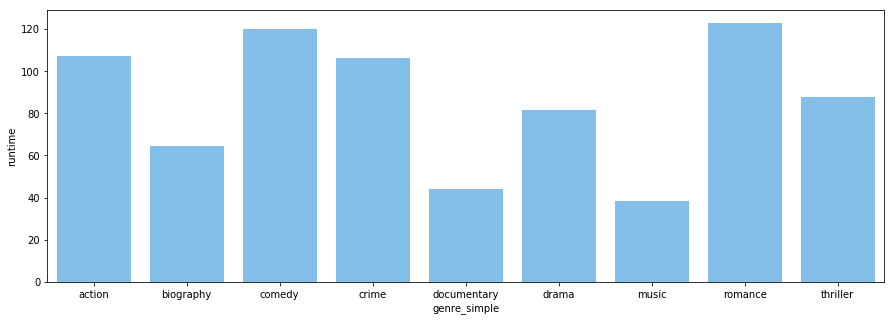

In [107]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 5]
sns.barplot(x='genre_simple', y='runtime', data=df_runtime_mean, color='#73C2FB')

#### thoughts
From this, we can see that **action**, **comedy**, **romance** movies have higher runtime.  
Whereas, **music** and **documentary** movies have lower runtime.